In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Taran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [7]:
column_names=['target','id','date','flag','user','text']
twitter_data=pd.read_csv("C:/Users/Taran/OneDrive/Desktop/sentiment analysis/training.1600000.processed.noemoticon.csv",names=column_names, encoding='ISO-8859-1')

In [8]:
twitter_data.shape

(1600000, 6)

In [9]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [11]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [12]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [13]:
twitter_data.replace({'target':{4:1}}, inplace=True)

In [14]:
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

In [15]:
port_stem=PorterStemmer()

In [16]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-z]',' ', content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [17]:
twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

In [18]:
twitter_data.head()

,target,id,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [19]:
x=twitter_data['stemmed_content'].values
y=twitter_data['target'].values

In [20]:
print(x)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [21]:
print(y)

[0 0 0 ... 1 1 1]


In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [23]:
print(x.shape,x_train.shape,x_test.shape)

(1600000,) (1280000,) (320000,)


In [24]:
print(x_train)

['watch saw iv drink lil wine' 'hatermagazin'
 'even though favourit drink think vodka coke wipe mind time think im gonna find new drink'
 ... 'eager monday afternoon'
 'hope everyon mother great day wait hear guy store tomorrow'
 'love wake folger bad voic deeper']


In [25]:
print(x_test)

['mmangen fine much time chat twitter hubbi back summer amp tend domin free time'
 'ah may show w ruth kim amp geoffrey sanhueza'
 'ishatara mayb bay area thang dammit' ...
 'destini nevertheless hooray member wonder safe trip' 'feel well'
 'supersandro thank']


In [26]:
vectorizer=TfidfVectorizer()
x_train=vectorizer.fit_transform(x_train)
x_test=vectorizer.transform(x_test)

In [27]:
print(x_train)

  (0, 464940)	0.4483581441053542
  (0, 247667)	0.4215060595161854
  (0, 116318)	0.3749338694119814
  (0, 194823)	0.5274064910069903
  (0, 372989)	0.3583819096048567
  (0, 458421)	0.27228112326228093
  (1, 169453)	1.0
  (2, 304223)	0.1678648733603879
  (2, 140239)	0.20289994039686138
  (2, 159240)	0.18800868496584808
  (2, 187474)	0.16194060015844067
  (2, 429906)	0.15168139293444055
  (2, 281186)	0.24137202118772233
  (2, 465311)	0.33480686186877023
  (2, 83506)	0.31303964332256906
  (2, 455221)	0.3296073093697297
  (2, 427034)	0.32103058232997417
  (2, 137276)	0.29069581876534506
  (2, 427967)	0.18706371586911208
  (2, 132152)	0.1891875792321668
  (2, 116318)	0.45905705320412793
  (3, 181609)	0.3745702863460754
  (3, 432396)	0.2708400841098632
  (3, 408311)	0.3941744062368762
  (3, 61032)	0.52009780709937
  :	:
  (1279996, 409874)	0.21996814268672968
  (1279996, 455685)	0.27108924963905606
  (1279996, 335154)	0.21190629789318696
  (1279996, 250767)	0.22319402802219876
  (1279996, 3069

In [28]:
print(x_test)

  (0, 442233)	0.17903569516819148
  (0, 429906)	0.3140986667345934
  (0, 419078)	0.34884649404705365
  (0, 408024)	0.21977439030363208
  (0, 294440)	0.17813419553395948
  (0, 285841)	0.4532311769636366
  (0, 180544)	0.2803743470609849
  (0, 146252)	0.23682534421364126
  (0, 140294)	0.25509664355434203
  (0, 112919)	0.367081693610678
  (0, 72943)	0.2678484639307855
  (0, 34872)	0.16236726920078096
  (0, 17977)	0.17180827032540266
  (1, 385085)	0.24302725359248564
  (1, 366102)	0.4820488545932507
  (1, 270721)	0.28432607616832933
  (1, 229396)	0.40557814327518943
  (1, 153709)	0.5722666578553444
  (1, 17977)	0.2084958588978494
  (1, 8801)	0.30376315944222493
  (2, 420861)	0.4330300886388968
  (2, 270795)	0.2562344190631401
  (2, 192882)	0.5885804190746107
  (2, 95488)	0.363168936008175
  (2, 38175)	0.37941511785250515
  :	:
  (319994, 130897)	0.4539824479197656
  (319995, 466849)	0.3209500415545892
  (319995, 442233)	0.22620821621683035
  (319995, 437352)	0.23804373106127552
  (319995, 3

In [29]:
model=LogisticRegression(max_iter=1000)

In [30]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [32]:
print("accuracy score on the training data:",training_data_accuracy)
print("accuracy percentage on the training data:",training_data_accuracy*100)

accuracy score on the training data: 0.81172265625
accuracy percentage on the training data: 81.172265625


In [33]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [34]:
print("accuracy score on the testing data:",testing_data_accuracy)
print("accuracy percentage on the testing data:",testing_data_accuracy*100)

accuracy score on the testing data: 0.778546875
accuracy percentage on the testing data: 77.8546875


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_model = RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=10,min_samples_leaf=5,n_jobs=-1,random_state=42)

In [37]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=50, n_jobs=-1, random_state=42)

In [38]:
x_train_prediction_rf=rf_model.predict(x_train)
training_data_accuracy_rf=accuracy_score(y_train,x_train_prediction_rf)

In [39]:
print("accuracy score on the training data:",training_data_accuracy_rf)
print("accuracy percentage on the training data:",training_data_accuracy_rf*100)

accuracy score on the training data: 0.71660625
accuracy percentage on the training data: 71.660625


In [40]:
x_test_prediction_rf=rf_model.predict(x_test)
testing_data_accuracy_rf=accuracy_score(y_test,x_test_prediction_rf)

In [41]:
print("accuracy score on the testing data:",testing_data_accuracy_rf)
print("accuracy percentage on the testing data:",testing_data_accuracy_rf*100)

accuracy score on the testing data: 0.71291875
accuracy percentage on the testing data: 71.291875


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix, classification_report
precision1=precision_score(y_test,x_test_prediction)
precision2=precision_score(y_test,x_test_prediction_rf)

recall1=recall_score(y_test,x_test_prediction)
recall2=recall_score(y_test,x_test_prediction_rf)

f11=f1_score(y_test,x_test_prediction)
f12=f1_score(y_test,x_test_prediction_rf)

cm1=confusion_matrix(y_test,x_test_prediction)
cm2=confusion_matrix(y_test,x_test_prediction_rf)

class_report1=classification_report(y_test,x_test_prediction)
class_report2=classification_report(y_test,x_test_prediction_rf)

print(class_report1)
print("\n")
print(class_report2)

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



              precision    recall  f1-score   support

           0       0.73      0.68      0.70    160000
           1       0.70      0.75      0.72    160000

    accuracy                           0.71    320000
   macro avg       0.71      0.71      0.71    320000
weighted avg       0.71      0.71      0.71    320000



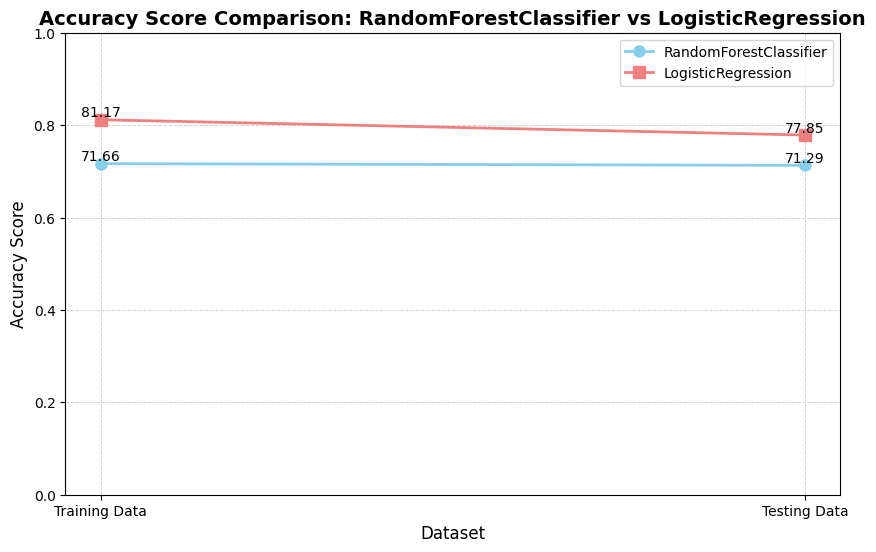

In [43]:
import matplotlib.pyplot as plt

# Define accuracy scores for RandomForestClassifier and LogisticRegression
rf_accuracy_scores = [training_data_accuracy_rf, testing_data_accuracy_rf]
lr_accuracy_scores = [training_data_accuracy, testing_data_accuracy]
labels = ['Training Data', 'Testing Data']

# Plot the accuracy scores for both classifiers as line graphs
fig, ax = plt.subplots(figsize=(10, 6))

# RandomForestClassifier accuracy plot
ax.plot(labels, rf_accuracy_scores, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8, label='RandomForestClassifier')
for i in range(len(labels)):
    ax.text(i, rf_accuracy_scores[i], f'{rf_accuracy_scores[i]*100:.2f}', ha='center', va='bottom', color='black')

# LogisticRegression accuracy plot
ax.plot(labels, lr_accuracy_scores, marker='s', color='lightcoral', linestyle='-', linewidth=2, markersize=8, label='LogisticRegression')
for i in range(len(labels)):
    ax.text(i, lr_accuracy_scores[i], f'{lr_accuracy_scores[i]*100:.2f}', ha='center', va='bottom', color='black')

# Add title, labels, and legend
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Accuracy Score Comparison: RandomForestClassifier vs LogisticRegression', fontsize=14, fontweight='bold')
ax.grid(True, linestyle='--', linewidth=0.7, color='lightgrey')
ax.set_ylim(0, 1)
ax.legend()

plt.show()


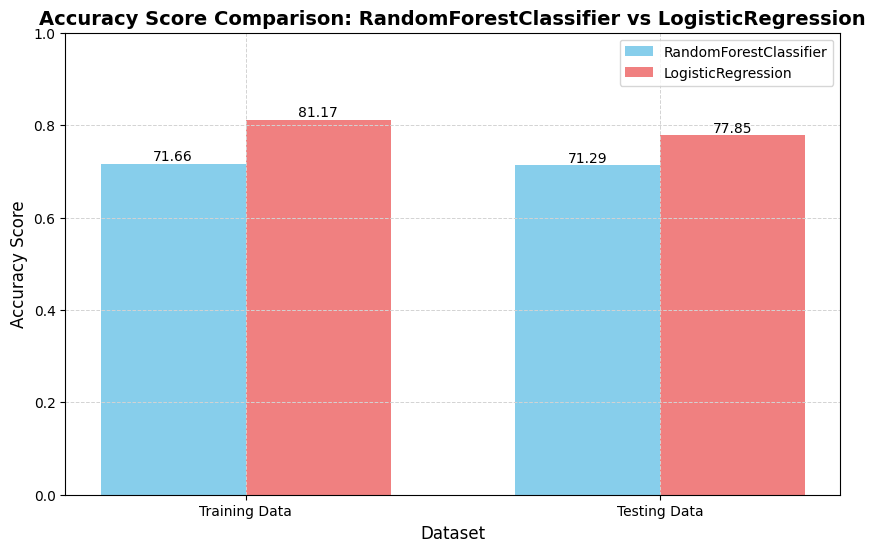

In [44]:
import matplotlib.pyplot as plt

# Define accuracy scores for RandomForestClassifier and LogisticRegression
rf_accuracy_scores = [training_data_accuracy_rf, testing_data_accuracy_rf]
lr_accuracy_scores = [training_data_accuracy, testing_data_accuracy]
labels = ['Training Data', 'Testing Data']

# Plot the accuracy scores for both classifiers as bar graphs
fig, ax = plt.subplots(figsize=(10, 6))

# RandomForestClassifier accuracy plot
bar_width = 0.35
bar_positions = list(range(len(labels)))
ax.bar(bar_positions, rf_accuracy_scores, bar_width, color='skyblue', label='RandomForestClassifier')
ax.bar([pos + bar_width for pos in bar_positions], lr_accuracy_scores, bar_width, color='lightcoral', label='LogisticRegression')

# Add data labels
for i, (rf_score, lr_score) in enumerate(zip(rf_accuracy_scores, lr_accuracy_scores)):
    ax.text(i, rf_score, f'{rf_score*100:.2f}', ha='center', va='bottom', color='black')
    ax.text(i + bar_width, lr_score, f'{lr_score*100:.2f}', ha='center', va='bottom', color='black')

# Add title, labels, and legend
ax.set_xlabel('Dataset', fontsize=12)
ax.set_ylabel('Accuracy Score', fontsize=12)
ax.set_title('Accuracy Score Comparison: RandomForestClassifier vs LogisticRegression', fontsize=14, fontweight='bold')
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', linewidth=0.7, color='lightgrey')
ax.set_ylim(0, 1)
ax.legend()

plt.show()



In [45]:
import pickle

In [46]:
filename='trained_modle.sav'
pickle.dump(model,open(filename,'wb'))

In [47]:
vectorizer_filename = 'vectorizer.sav'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))

In [50]:
loaded_model=pickle.load(open(r'C:\Users\Taran\OneDrive\Desktop\sentiment analysis\trained_modle.sav','rb'))

In [51]:
x_new=x_test[200]
print(y_test[200])

prediction=model.predict(x_new)
print(prediction)

if(prediction[0]==0):
  print("negative tweet")
else:
  print("positive tweet")

1
[1]
positive tweet


In [55]:
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from io import BytesIO
import numpy as np

def analyze_tweets():
    entered_word = entry_word.get().strip()
    if not entered_word:
        messagebox.showwarning("Input Error", "Please enter a word.")
        return

    stemmed_word = stemming(entered_word)  # Apply stemming to the entered word
    tweets_with_word = twitter_data[twitter_data['text'].str.contains(stemmed_word, regex=False, case=False)]
    if tweets_with_word.empty:
        messagebox.showinfo("Tweet Analysis", f"No tweets found containing the word '{entered_word}'.")
        return
    
    X_tweets_with_word = vectorizer.transform(tweets_with_word['text'])
    predictions = loaded_model.predict(X_tweets_with_word)

    negative_tweets_count = sum(predictions == 0)
    positive_tweets_count = sum(predictions == 1)
    total_count = len(predictions)

    negative_percentage = (negative_tweets_count / total_count) * 100
    positive_percentage = (positive_tweets_count / total_count) * 100

    plt.figure(figsize=(6, 6))
    labels = 'Negative Tweets', 'Positive Tweets'
    sizes = [negative_percentage, positive_percentage]
    colors = ['red', 'green']
    explode = (0, 0.1)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f"Sentiment Analysis for '{entered_word}'")

    # Save the pie chart image to a BytesIO buffer
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)

    # Create a PhotoImage from the buffer
    image = Image.open(buf)
    photo = ImageTk.PhotoImage(image)

    # Create a message box with the image
    message_box = tk.Toplevel(root)
    message_box.title("Tweet Analysis")

    label = tk.Label(message_box, image=photo)
    label.image = photo
    label.pack()

    # Add the analysis results to the message box
    result_label = tk.Label(message_box, text=f"The word '{entered_word}' appears in {total_count} tweets.\n"
                                             f"Negative tweets: {negative_percentage:.2f}%\n"
                                             f"Positive tweets: {positive_percentage:.2f}%")
    result_label.pack()

    message_box.mainloop()

# GUI setup
root = tk.Tk()
root.title("Twitter Sentiment Analysis")

label_word = tk.Label(root, text="Enter a word:")
label_word.pack()

entry_word = tk.Entry(root)
entry_word.pack()

analyze_button = tk.Button(root, text="Analyze", command=analyze_tweets)
analyze_button.pack()

root.mainloop()